In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_excel('polynomial_regression_data.xlsx')

In [14]:
df.head()

,X,Y
0,-10.000000,289.967142
1,-9.591837,260.443679
2,-9.183673,246.129114
3,-8.775510,233.708016
4,-8.367347,195.961257


In [15]:
df.isnull().sum()

X    0
Y    0
dtype: int64

In [16]:
df.shape

(50, 2)

In [21]:
X=df[['X']]
y=df['Y']

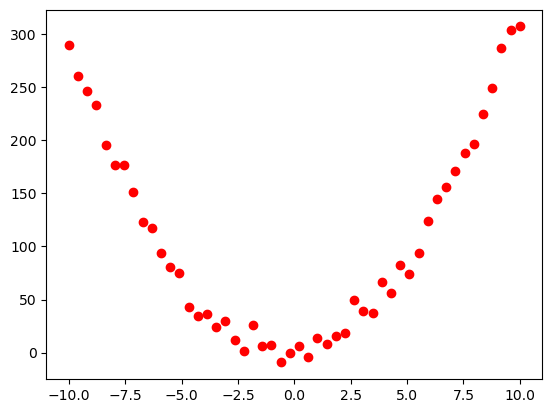

In [22]:
plt.scatter(X,y,color='r')

In [23]:
X

,X
0,-10.000000
1,-9.591837
2,-9.183673
3,-8.775510
4,-8.367347
5,-7.959184
6,-7.551020
7,-7.142857
8,-6.734694
9,-6.326531


In [24]:
y

0     289.967142
1     260.443679
2     246.129114
3     233.708016
4     195.961257
5     176.786077
6     176.743815
7     151.449857
8     122.904173
9     117.847508
10     93.610305
11     80.409341
12     75.308003
13     42.576902
14     34.281434
15     36.728228
16     24.042867
17     30.133310
18     11.729838
19      1.505868
20     26.103801
21      6.007543
22      6.758164
23     -9.347440
24     -0.727043
25      6.642337
26     -4.160915
27     13.921495
28      7.973205
29     15.877315
30     18.591430
31     49.945106
32     39.100763
33     37.471620
34     66.086757
35     56.465033
36     82.573850
37     73.699842
38     93.825595
39    123.886563
40    145.112696
41    156.251375
42    171.190456
43    188.144731
44    196.178962
45    224.573736
46    248.973371
47    286.958144
48    303.629852
49    307.369598
Name: Y, dtype: float64

In [25]:
type(X)

pandas.core.frame.DataFrame

In [26]:
type(y)

pandas.core.series.Series

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [28]:
##standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [31]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [32]:
X_test

array([[-0.72218832],
       [ 1.0277995 ],
       [ 0.42203449],
       [ 1.43164285],
       [-0.45295943],
       [ 1.63356452],
       [ 0.15280559],
       [ 0.08549837],
       [ 0.55664893],
       [-0.31834498],
       [-0.78949555],
       [-1.32795334],
       [ 0.89318506]])

In [33]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [36]:
regression.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred=regression.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
adjusted_score=1-(1-score)*(len(y_test)-1)/(len(y_test)-1-X_test.shape[1])

In [ ]:
print(mae)
print(mse)
print(rmse)
print(score)## negative r2_score show the model is poorly fitted to the data or overfitting and underfitting
print(adjusted_score)

86.64437315260601
9320.00750163548
96.54018594158332
-0.06598717391990871
-0.1628950988217186


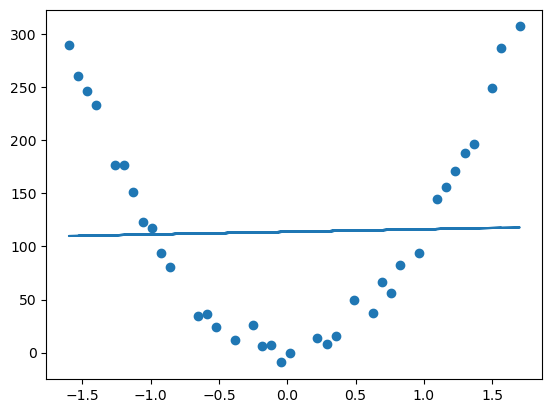

In [42]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))


A negative R² is a red flag! 🚩 It means your model isn’t useful as it stands and needs to be re-evaluated. Let me know if you need help debugging it! 😊









In [43]:
##use of polynomial regression of 2 degree
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)


In [44]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)


In [ ]:
X_train_poly## this the value of 1,x1,x1^2


array([[ 1.00000000e+00, -1.05872444e+00,  1.12089745e+00],
       [ 1.00000000e+00, -1.39526056e+00,  1.94675204e+00],
       [ 1.00000000e+00, -1.19333889e+00,  1.42405771e+00],
       [ 1.00000000e+00,  1.16241395e+00,  1.35120619e+00],
       [ 1.00000000e+00,  1.49895007e+00,  2.24685132e+00],
       [ 1.00000000e+00,  1.56625730e+00,  2.45316192e+00],
       [ 1.00000000e+00, -5.87573875e-01,  3.45243059e-01],
       [ 1.00000000e+00, -9.91417220e-01,  9.82908104e-01],
       [ 1.00000000e+00, -5.20266651e-01,  2.70677388e-01],
       [ 1.00000000e+00,  1.81911417e-02,  3.30917635e-04],
       [ 1.00000000e+00,  6.91263383e-01,  4.77845064e-01],
       [ 1.00000000e+00,  4.89341710e-01,  2.39455310e-01],
       [ 1.00000000e+00, -1.59718224e+00,  2.55099110e+00],
       [ 1.00000000e+00,  1.36433562e+00,  1.86141169e+00],
       [ 1.00000000e+00,  2.20112814e-01,  4.84496509e-02],
       [ 1.00000000e+00,  6.23956159e-01,  3.89321288e-01],
       [ 1.00000000e+00, -1.26064612e+00

In [47]:
X_test_poly

array([[ 1.        , -0.72218832,  0.52155597],
       [ 1.        ,  1.0277995 ,  1.05637182],
       [ 1.        ,  0.42203449,  0.17811311],
       [ 1.        ,  1.43164285,  2.04960124],
       [ 1.        , -0.45295943,  0.20517224],
       [ 1.        ,  1.63356452,  2.66853304],
       [ 1.        ,  0.15280559,  0.02334955],
       [ 1.        ,  0.08549837,  0.00730997],
       [ 1.        ,  0.55664893,  0.30985804],
       [ 1.        , -0.31834498,  0.10134353],
       [ 1.        , -0.78949555,  0.62330322],
       [ 1.        , -1.32795334,  1.76346007],
       [ 1.        ,  0.89318506,  0.79777954]])

In [48]:
##till here we convert the data in polynomial form 
##NOW train the model
regression1=LinearRegression()

In [49]:
regression1.fit(X_train_poly,y_train)

LinearRegression()

In [50]:
y_pred_poly=regression1.predict(X_test_poly)

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred_poly)
mse=mean_squared_error(y_test,y_pred_poly)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred_poly)
adjusted_score=1-(1-score)*(len(y_test)-1)/(len(y_test)-1-X_test.shape[1])

In [52]:
print(mae)
print(mse)
print(rmse)
print(score)
print(adjusted_score)

7.195513401384976
77.99265058932814
8.83134477808041
0.9910794958937907
0.9902685409750445


<function matplotlib.pyplot.show(close=None, block=None)>

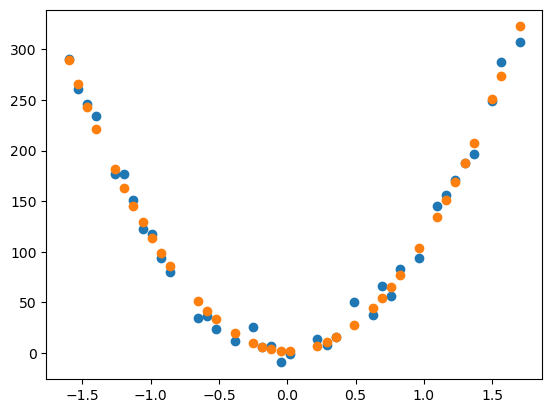

In [ ]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression1.predict(X_train_poly),linewidths=1)
##Orange show the best fit curve that makes an accuracy of 99.107